# 오차 역전파

수치 미분으로 신경망을 학습하면 너무 느려서 오차 역전파법이라는 것을 설명한다.  
오차역전파법을 쉽게 설명하기 위해 그림으로 설명하는 계산 그래프 그림을 이용해서 오차 역전파 법을 사용하고 있다.

## 계산 그래프
순전파와 역전파에 계산과정으로 그래프로 나타내는 방법  
<br>
계산 그래프의 장점은? " 국소적 계산을 할 수 있다."  
국소적 계산이란? 전체에서 어떤일이 벌어지든 상관없이 자신과 관련된 정보만으로 원하는 결과를 얻어낼 수 있는 계산 방식

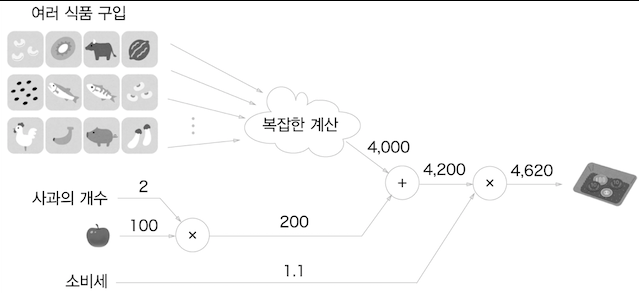

4000원이라는 숫자가 어떻게 계산되었느냐와는 상관없이 사과가 어떻게 200원이 되었는가만 신경쓰면 된다는 것이 국소적 계산

## 왜 계산 그래프로 문제를 해결하는가?
전체가 아무리 복잡해도 각 노드에서 단순한 계산에만 집중하여 문제를 단순화 시킬 수 있다.  
큰 문제를 해결하는 방법이 큰 문제는 작은 문제들이 여러개로 묶여 있는 것이므로 작은 문제들을 하나씩 해결하면서 큰 문제를 해결하는 방법(다이나믹 프로그래밍)  
~~~
입력값 -----> 활성화 함수 -----> 출력층 함수 -----> 오차 함수
            시그모이드 함수      소프트 맥스 함수    교차 엔트로피 함수    < 분류문제 >
            렐루 함수           항등 함수         평균제곱오차         < 회귀문제 >
~~~
최종적으로 산출하고자 하는 것은 오차가 가장 적은 가중치이다.  
'가중치(w1)'에 변화가 생겼을때 '오차는 얼마나 달라지는지와 '사과값'이 아주 조금 올랐을때 '지불금액'이 얼마나 증가히였는지 알고 싶다면?  
$${\operatorname{\partial}(fare)\over\operatorname{\partial}(apple's price)}$$
지불 금액을 사과값으로 편미분하면 알수 있다.  
계산 그래프의 역전파를 이용하면 위의 계산을 할 수 있다.  

문제 1. 현빈군은 슈퍼에서 1개의 100원인 사과를 2개를 샀습니다. 이때의 지불 금액을 구하시오. 단 소비세가 10%가 부과 됨

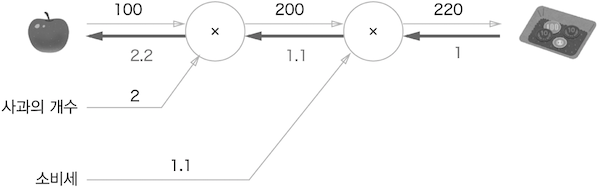  

문제 2. 현빈군은 슈퍼에서 사과2개, 귤을 3개 샀습니다. 사과는 1개에 100원, 귤은 1개에 150원 입니다. 소비세가 10%일때 기불 금액을 구하시오  

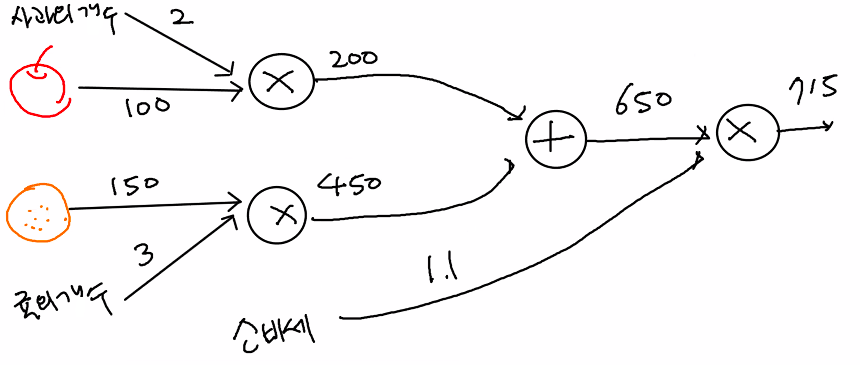

In [1]:
(2 * 100)*1.1 + (3 * 150) * 1.1

## 덧셈 계산 그래프

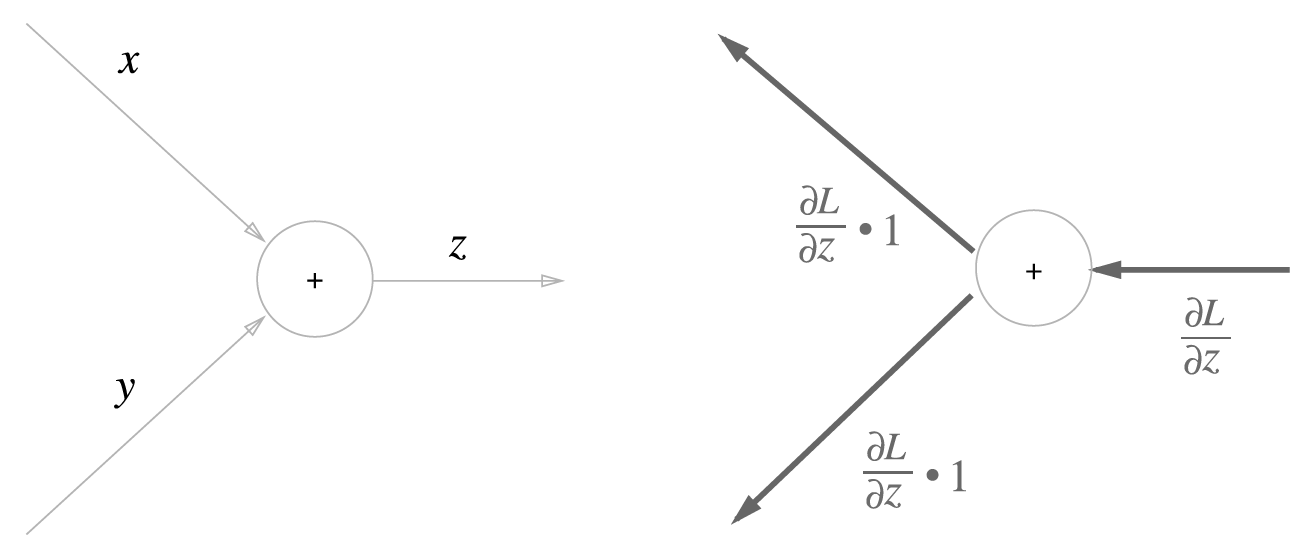

설명: 덧셈노드의 역전파는 상류에서 흘러왔던 값이 그대로 흘러갑니다.  

<br>

문제 91. 아래의 덧셈노드 그래프의 순전파 값과 역전파 값을 적으시오

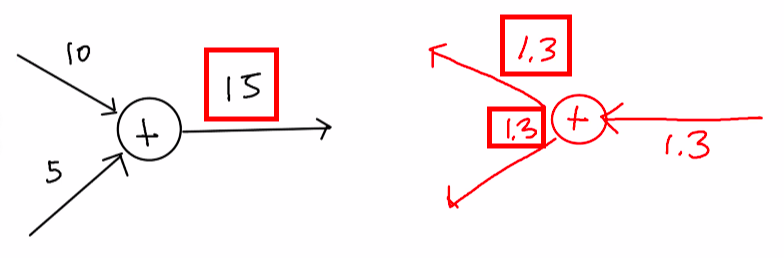

## 곱셈 계산 그래프

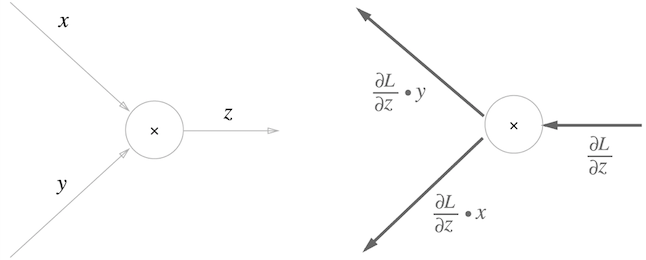

문제 92. 아래의 곱셈 노드의 순전파 값과 역전파 값을 각각 적으시오


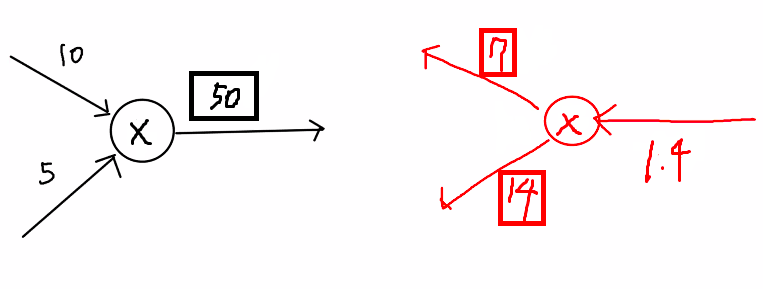
문제 93. 곱셈 계층을 파이썬으로 구현하시오

In [2]:
class MulLayer:
    def __init__(self):
        self.x = None
        self.y = None
    
    def forward(self, x, y):  # 순전파
        self.x = x
        self.y = y
        out = x * y
        return out
    
    def backward(self, dout):  # 역전파
        dx = dout * self.y
        dy = dout * self.x
        return dx, dy

문제 94. 위에서 만든 곱셈 클래스를 객체화시켜서 아래의 사과 가격을 구하시오

In [3]:
apple = 100
apple_num =2

price = MulLayer()
price.forward(apple, apple_num)

문제 95. 아래의 그림 5-2를 계산하시오
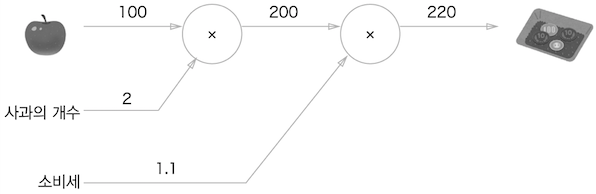

In [4]:
apple = 100
apple_num =2
tax = 1.1

# 계층들
mul_apple_layer = MulLayer()
mul_tax_layer = MulLayer()

apple_price = mul_apple_layer.forward(apple, apple_num)
tax_with = mul_tax_layer.forward(apple_price, tax)
tax_with

문제 96. 덧셈계층 클래스를 파이썬으로 구현하시오

In [5]:
class AddLayer:
    def __init__(self):
        self.x = None
        self.y = None
        
    def forward(self, x, y):
        self.x = x
        self.y = y
        out = x + y
        return out
    
    def backward(self, dout):
        dx = dout
        dy = dout
        return dx, dy

문제 97. 위에서 만든 곱셈 클래스와 덧셈 클래스를 이용해서 그림 5-3의 계산 그래프를 구현하고 최종 값을 계산하시오

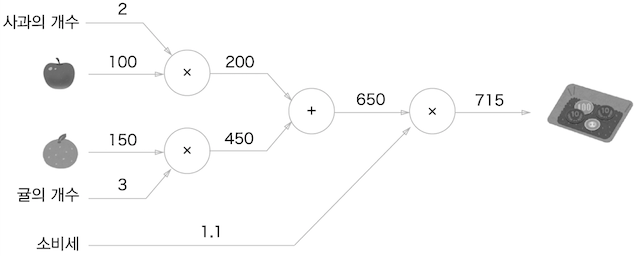

In [6]:
# 사과, 귤의 가격과 갯수
apple_price = 100
apple_num = 2
tranger_price = 150
tranger_num = 3

# 세금 계산
tax = 1.1

# 계층 생성
apple_layer = MulLayer()
tringer_layer = MulLayer()
tax_layer = MulLayer()
add_apple_tang_layer = AddLayer()

# 계산
price1 = apple_layer.forward(apple_price, apple_num)
price2 = tringer_layer.forward(tranger_price, tranger_num)
add_price = add_apple_tang_layer.forward(price1, price2)
tax_with = tax_layer.forward(add_price, tax)
print(tax_with)

715.0000000000001


## 활성화 함수 계층 구현하기
1. 계산 그래프
    - 덧셈 그래프
    - 곱셈 그래프
    - 렐루 그래프
    - 시그모이드 함수 그래프
    - 교차엔트로피 함수 그래프
    - 소프트맥스 함수 그래프

<br>

계산 그래프를 보면서 순전파, 역전파 함수를 생성

## 렐루 함수를 위한 계산 그래프
0보다 큰 값이 입력이 되면 그 값을 그대로 출력하고  
0이거나 0보다 작은 값이 입력이 되면 0을 출력하는 함수

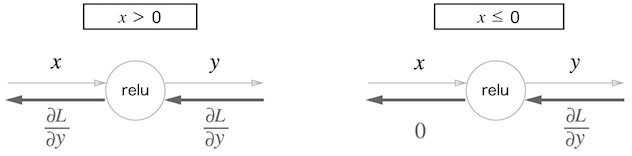

렐루 함수를 구현하려면 알아야 하는 문법 2가지
1. copy 모듈 사용법
2.x[x <=0]의 의미

### copy 모듈의 사용법

In [7]:
a = [ 1,2,3 ]
b = a   # 파이썬은 메모리를 줄이려고 메모리에서 같은 위치에 기억을 한다.
print(b)
a[1] = 6
print(a)
print(b)

[1, 2, 3]
[1, 6, 3]
[1, 6, 3]


In [8]:
# 위의 b는 a와 같은 곳을 바라보고 있는 데 이렇게 하지 않고 
# 새롭게 b를 위한 [1,2,3]을 만들고 싶다면 copy를 이용해야 한다.
import copy

a = [1,2,3]
b = a.copy()  # copy를 했기 때문에 b는 별도의 객체가 됨
print(a)
print(b)
a[ 1 ]
print(a)
print(b)

[1, 2, 3]
[1, 2, 3]
[1, 2, 3]
[1, 2, 3]


### x[x <=0]의 의미
- 렐루는 순전파 때 보냈던 신호를 기억하고 있어야 하기 때문에 필요
- 그 자리에 신호가보내졌었는가를 기억해야 한다

In [9]:
import numpy as np

x = np.array( [[1.0, -0.5], [-2.0, 3.0]] )
print(x)
mask = (x <= 0)
print(mask)

[[ 1.  -0.5]
 [-2.   3. ]]
[[False  True]
 [ True False]]


In [10]:
out = x.copy()
out[mask] = 0
print(out)

[[1. 0.]
 [0. 3.]]


 문제 98. Relu 클래스를 생성하시오 !

In [11]:
class Relu:
    def __init__(self):
        self.mask = None
    
    def forward(self, x):
        self.mask = (x<=0)
        out = x.copy()
        out[self.mask] = 0
        
        return out
    
    def backward(self, dout):
        dout[self.mask] = 0
        dx = dout
        
        return dx

x = np.array([[1.0, -0.5], [-2.0, 3.0]])
relu = Relu()
print(relu.forward(x))
dout = np.array([[2.0, 3.0], [-3.0, -4.0]])
print(relu.backward(dout))

[[1. 0.]
 [0. 3.]]
[[ 2.  0.]
 [ 0. -4.]]


# Sigmoid 계층

$$y = \frac{1}{1+\exp(-x)}$$  

계산 그래프 <br>

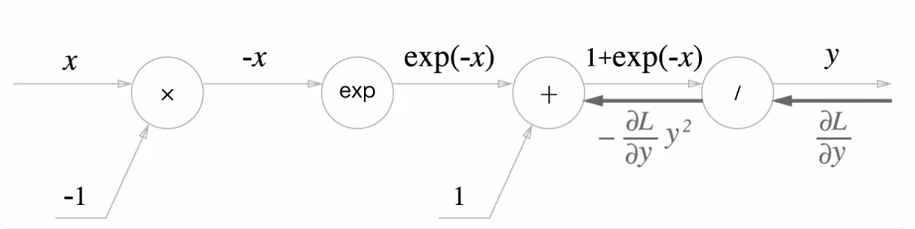


In [12]:
# 예제 1. 시그모이드 함수의 순전파를 파이썬 코드로 구현하시오
class Sigmoid:
    def __init__(self):
        self.out = None
        
    def forward(self, x):
        out = 1 / (1 + np.exp(-x))
        self.out = out
            
        return out

문제 99. 위의 시그모이드 클래스를 객체화시켜서 아래의 데이터를 forward 함수에 넣고 실행하시오

In [13]:
x = np.array([ 24, 32, 5 ])
sigmoid = Sigmoid()
sigmoid.forward(x)

array([1.        , 1.        , 0.99330715])

In [14]:
# 시그모이드 함수를 파이썬으로 날코딩하기( backward 부분 구성 )
class Sigmoid:
    def __init__(self):
        self.out = None
        
    def forward(self, x):
        out = 1 / (1 + np.exp(-x))
        self.out = out
            
        return out
    
    def backward(self, dout):
        dx = dout * ( 1.0 - self.out ) * self.out
        
        return dx

위에서 만든 시그모이드 클래스를 객체화시켜서 순전파와 역전파를 각각 구현하시오

In [15]:
x = np.array([[1.0, -0.5], [-2.0, 3.0]])
sim = Sigmoid()
print(sim.forward(x), '\n')  # 순전파
# 순전파일 때 2x2행렬로 흘러갔으면 역잔파일 경우도 2x2행렬로 흘러온다.
# 순전파일 경우 입력값이 흘러가고 시그모이드를 통과하면 확률로 출력이 된다.
# 역전파일 경우 오차가 흘러간다. 
# 오차가 플러가면서 미분 대신에 만든 도함수식과 오차가 같이 계산되면서 
# 오차가 계속 흘러가고 최종적으로 가중치에 오차가 반영이 되면서 가중치가 갱신되어진다.

dout = np.array([ [2.0, 3.0], [-3.0, -4.0]])
print( sim.backward(dout)) # 역전파

[[0.73105858 0.37754067]
 [0.11920292 0.95257413]] 

[[ 0.39322387  0.70501114]
 [-0.31498076 -0.18070664]]


파이썬으로 직접 sigmoid함수를 만들고 데이터를 넣고 계산되게 했는데  
지금부터는 텐서플로우를 이용해서 sigmoid 함수에 데이터를 넣고 계산하기   

|파이썬 날코딩|텐서플로우|
|:--:|:--:|
|우리가 직접 sigmoid함수를 생성|구글 개발자가 sigmoid 함수를 개발함|


# 텐서플로우 2.0 환경 구성

인공지능 프로그램을 구현할 때  
1. 일반사진을 화가 고흐풍으로 변환하고 싶다. ( 환경 구성 1 )  
2. 옥주현 AI 를 만들고 싶다.( 환경구성 2 )  

<br>

두 가지 환경을 별도로 분리해서 사용하는게 바람직 함.  
이럴 때 좋은 방법이 가상환경을 만드는 것  

1. 가상환경 만들기
~~~
python --version # 파이썬 버전 확인
conda create -n snowdeer_env python=3.8.5 # snowdeer_env 이름으로 파이썬 3.8.5의 아나콘다 가상환경을 만든다.
~~~

2. snowdeer_env 가상환경에 tensorlfow 설치 
~~~
activate snowdeer_env  # 만든 가상환경 snowdeer_env을 활성화시킨다
pip install tensorflow
~~~

4. snowdeer_env 가상환경에 jupyter notebook 설치
~~~
conda install jupyter notebook
~~~

5. snowdeer_env가상환경에 sklearn 설치
~~~
pip install sklearn
~~~

6. snowdeer_env 가상환경에 matplotlib 설치
~~~
pip install matplotlib
~~~


In [16]:
# 문제 101. 아래의 2x2 행렬을 텐서플로우의 시그모이드에 흘려보내시오
import tensorflow as tf

tf.__version__
#x = np.array([[1.0, -0.5], [-2.0, 3.0]])
x = tf.constant([[1.0, -0.5], [-2.0, 3.0]])
tf.math.sigmoid(x)

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[0.7310586 , 0.3775407 ],
       [0.11920291, 0.95257413]], dtype=float32)>

# Affine계층(순전파)
- 신경망의 순전파때 수행하는 행렬의 내적을 기하학에서 affine 변환이라고 함
- 그래서 신경망에서 입력값과 가중치의 내적의 합에 bias를 더하는 층을 Affine계층이라고 해서 구현함
- Affine 계층의 역활은 신경망에서 층을 하나 구성하는 부분

<br>

"지금까지의 계산 그래프는 노드 사이에 '스칼라값'이 흘렀는데 이에 반해 이번에는 '행렬'이 흐르고 있어 Affine 계층 구현이 필요함"


In [17]:
# 문제 102. Affine 계층 클래스(순전파)를 생성하시오
class Affine:
    def __init__(self, W, b):
        self.W = W
        self.b = b
        self.x = None
        self.dW = None
        self.db = None
        
    def forward(self, x):
        self.x = x
        out = np.dot(x, self.W) + self.b
        return out

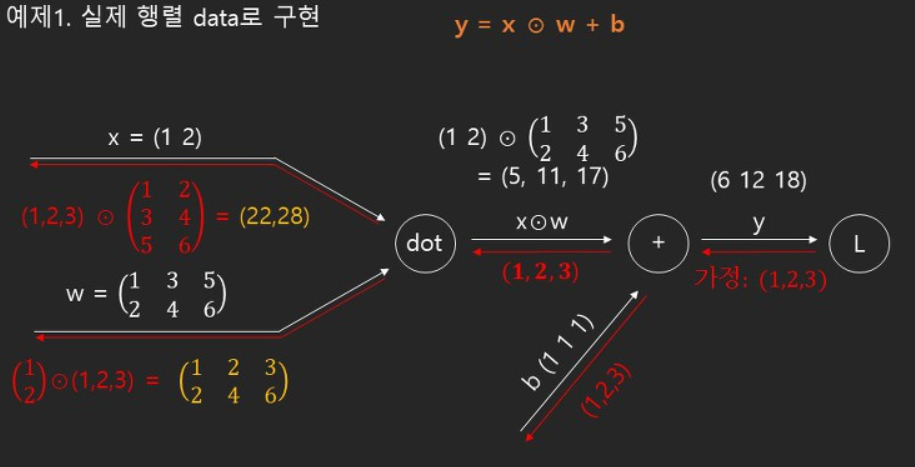

In [18]:
# 순전파
x = np.array([1,2]) 
W = np.array([[1,3,5],[2,4,6] ])
b = np.array([1,1,1])

affine1 = Affine(W, b)
affine1.forward(x)

array([ 6, 12, 18])

- 순전파는 위와 같이 구현하기ㅗ 역전파를 계산그래프를 그려서 도함수를 확인해서 도함수로 backward 함수를 구현하면 됨  
문제 103. 아래에 나오는 batch로 데이터를 신경망에 입력했을때의 순전파를 구현하시오  
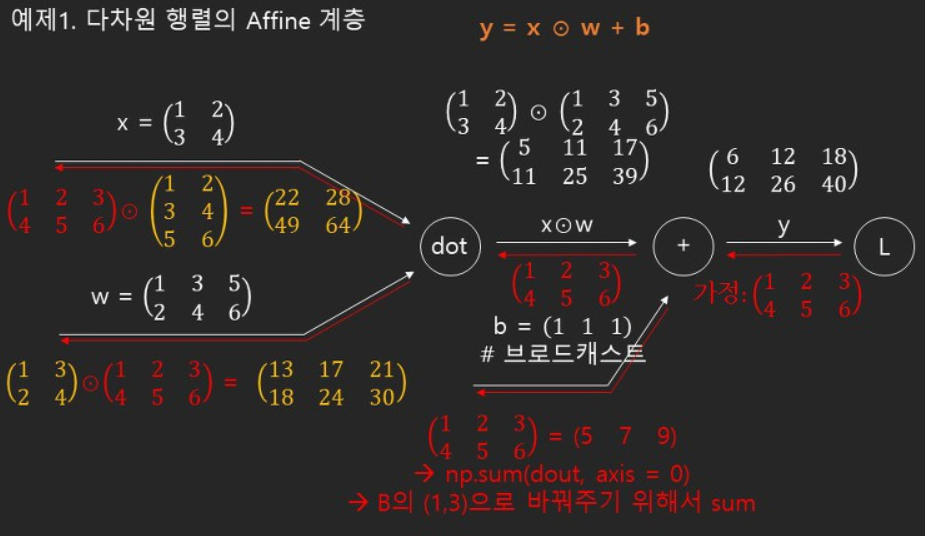

In [19]:
x = np.array([ [1,2],[3,4] ])
W = np.array([ [1,3,5], [2,4,6] ])
b = np.array([1,1,1])

affine2 = Affine(W,b)
affine2.forward(x)

array([[ 6, 12, 18],
       [12, 26, 40]])

# Affine 계층 (역전파)

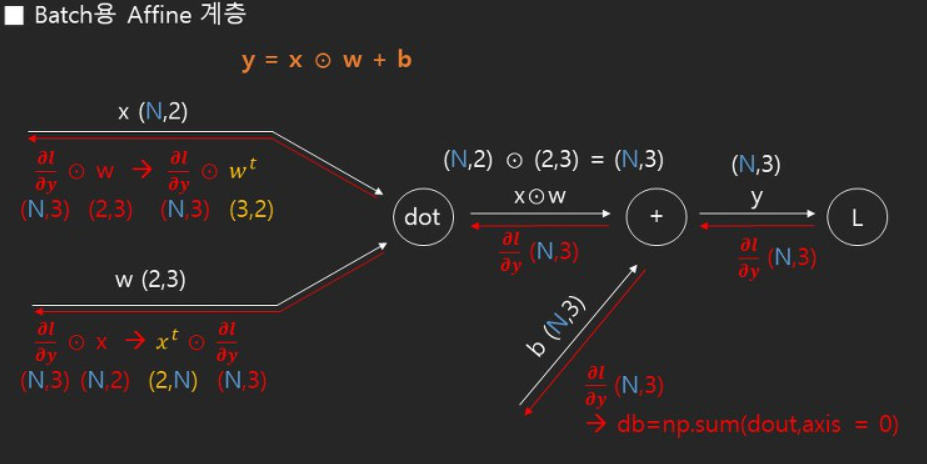

In [20]:
class Affine:
    def __init__(self, W, b):
        self.W = W
        self.b = b
        self.x = None
        self.dW = None
        self.db = None
        
    def forward(self, x):
        self.x = x
        out = np.dot(x, self.W) + self.b
        
        return out
    
    def backward(self, dout):
        dx = np.dot(dout, self.W.T)
        self.dW = np.dot(self.x, dout)
        self.db = np.sum(dout, axis=0)
        
        return dx